# Time Series Analysis

This project looks at company revenue over a certain amount of time for a hospital chain. Using time series modeling, visualizaitons

## Competencies 
__Time Series Analysis__ <br>
Applies time series models in generating forecasts.

## Write Up 
__Research Question__ <br>
Using time series analysis, are there any distinguishable patterns that can be utilized to make future revenue predictions?

__Goals__ <br>
The objective or goal of this data analysis is to determine if a time series analysis can produce identifiable patterns that can be used to make predictions about future revenue. 

__Summary of Assumptions__ <br>
The assumptions of a time series model include:

1. Stationarity – The data needs to be stationary which addresses three main criteria. Variance is constant, no trends in the data, and the autocorrelation is constant. The data should be normally distributed with constant mean and variance. 
2. Autocorrelation – “Autocorrelation is a mathematical representation of the degree of similarity between a given time series and a lagged version of itself over successive time intervals.” (Elleh, 2021) As mentioned above, autocorrelation should remain constant. 
3. Error term – The error term should be randomly distributed and uncorrelated. (Elleh, 2021) 


## Code

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Importing medical time series data CSV and creating the medical_data DataFrame
df_med = pd.read_csv('C:/Users/Makayla Avendano/Desktop/med_time.csv')

In [4]:
print('Shape of data: ', df_med.shape) 
df_med.head()

Shape of data:  (731, 2)


,Day,Revenue
0,1,0.000000
1,2,-0.292356
2,3,-0.327772
3,4,-0.339987
4,5,-0.124888


In [5]:
df_med.tail()

,Day,Revenue
726,727,15.722056
727,728,15.865822
728,729,15.708988
729,730,15.822867
730,731,16.069429


In [6]:
df_med.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Day      731 non-null    int64  
 1   Revenue  731 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 11.5 KB


## Time Step Formatting
The data has 731 days or 731 sequences with no gaps within the measurement.  To determine the length of the sequence within the data set, it is important first to make sure the data is cleaned accurately. Duplicates, missing values, non-null values, and NA values were all checked with all values within the data set. The .info() function was also used to get a description of the data indicating that all 731 values were accounted for. 

The data was then converted into a time series object and set as the index of the data set to begin the time series analysis.


In [7]:
# Duplicates 
medical_duplicates = df_med.duplicated()
print(medical_duplicates.value_counts())

False    731
Name: count, dtype: int64


In [8]:
# Missing Values 
# Sum of all null values within each column 
df_med.isnull().sum()

Day        0
Revenue    0
dtype: int64

In [9]:
# NA Values 
# Sum of all null values within each column 
df_med.isna().sum()

Day        0
Revenue    0
dtype: int64

In [10]:
# Change to time series object
df_med['Day'] = (pd.date_range(start=datetime(2019,1,1), periods=df_med.shape[0], freq='24H'))

# Set Day as index 
df_med.set_index('Day', inplace=True) 

In [11]:
print('Shape of data: ', df_med.shape) 
df_med.head()

Shape of data:  (731, 1)


,Revenue
Day,
2019-01-01,0.000000
2019-01-02,-0.292356
2019-01-03,-0.327772
2019-01-04,-0.339987
2019-01-05,-0.124888


In [12]:
df_med.tail()

,Revenue
Day,
2020-12-27,15.722056
2020-12-28,15.865822
2020-12-29,15.708988
2020-12-30,15.822867
2020-12-31,16.069429


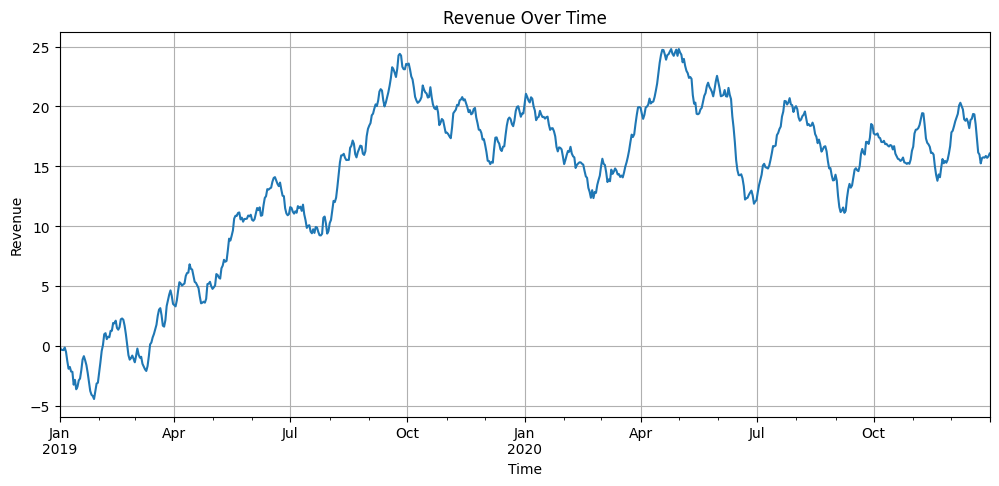

In [13]:
# Plot the data 
df_med['Revenue'].plot(figsize=(12, 5))
plt.title('Revenue Over Time')
plt.xlabel('Time')
plt.ylabel('Revenue')
plt.grid()
plt.show()

In [14]:
# Dickey Fuller Test
from statsmodels.tsa.stattools import adfuller

def ad_test(dataset):
    dftest = adfuller(dataset, autolag='AIC')
    print('1. ADF:', dftest[0])
    print('2. P-Value:', dftest[1])
    print('3. No. of Lags:', dftest[2])
    print('4. No. of Observations:', dftest[3])
    print('5. Critical Values:')
    for key, val in dftest[4].items():
        print("\t", key, ":", val)
    return dftest  # Return the ADF test results

adf_results = ad_test(df_med['Revenue'])

if adf_results[1] <= 0.05:
    print("Reject null hypothesis, the time series is stationary")
else:
    print("Fail to reject null hypothesis, the time series is non-stationary.")


1. ADF: -2.2183190476089485
2. P-Value: 0.19966400615064228
3. No. of Lags: 1
4. No. of Observations: 729
5. Critical Values:
	 1% : -3.4393520240470554
	 5% : -2.8655128165959236
	 10% : -2.5688855736949163
Fail to reject null hypothesis, the time series is non-stationary.


## Stationarity
After the initial ADF test, the p-value was not lower than the significance level 0.05 so therefore we failed to reject the null hypothesis indicating that the time series was non-stationary. To address this, we performed differencing. Differencing helps to stabilize the mean of the time series through computing the differences of consecutive observations (Elleh, 2021) Differencing was performed once and then the ADF test was performed again. 

In [15]:
# Make data stationary by differencing
df_stationary = df_med.diff().dropna()

# Dickey Fuller Test function
def ad_test(dataset):
    dftest = adfuller(dataset, autolag='AIC')
    print('1. ADF:', dftest[0])
    print('2. P-Value:', dftest[1])
    print('3. No. of Lags:', dftest[2])
    print('4. No. of Observations:', dftest[3])
    print('5. Critical Values:')
    for key, val in dftest[4].items():
        print("\t", key, ":", val)
    return dftest  # Return the ADF test results

adf_results = ad_test(df_stationary)

if adf_results[1] <= 0.05:
    print("Reject null hypothesis, the time series is stationary")
else:
    print("Fail to reject null hypothesis, the time series is non-stationary.")


1. ADF: -17.374772303557062
2. P-Value: 5.113206978840171e-30
3. No. of Lags: 0
4. No. of Observations: 729
5. Critical Values:
	 1% : -3.4393520240470554
	 5% : -2.8655128165959236
	 10% : -2.5688855736949163
Reject null hypothesis, the time series is stationary


In [16]:
# Split the data
X_train = df_med.loc[:'2020-08-06']
X_test = df_med.loc['2020-08-07':]
print('X_train shape ', X_train.shape)
print('X_test shape ', X_test.shape)

X_train shape  (584, 1)
X_test shape  (147, 1)


In [17]:
# Export clean data set 
df_med.to_csv("C:/Users/Makayla Avendano/Desktop/D213-clean-data.csv")

In [18]:
# Export train/test sets
X_train.to_csv("C:/Users/Makayla Avendano/Desktop/X_train_D213.csv")
X_test.to_csv("C:/Users/Makayla Avendano/Desktop/X_test_D213.csv")

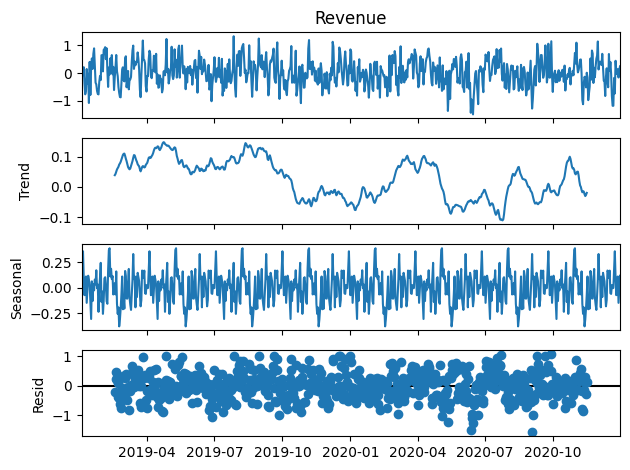

In [19]:
# Check for seasonality 
from statsmodels.tsa.seasonal import seasonal_decompose 
decomp = seasonal_decompose(df_stationary['Revenue'], model='additive', period=90) 
decomp.plot()
plt.show()

## Seasonality
“Seasonality refers to cycles that repeat regularly over time. The cycle structure is considered seasonal if it repeats at the same frequency.” (Elleh, 2021) Looking at the photo of seasonality below, it is evident that there is a repeated cycle thus indicating that seasonality is present. 

## Trends
The overall direction of the series seems to be inconsistent. There is not a definitive trend evident. 

## Residuals 
Extracting the residuals leaves us with the time series after the trend and seasonality are removed. (Elleh, 2021) The residuals shown support the assumption that the residuals are not auto correlated. 

<Axes: title={'center': 'Seasonality'}, xlabel='Day'>

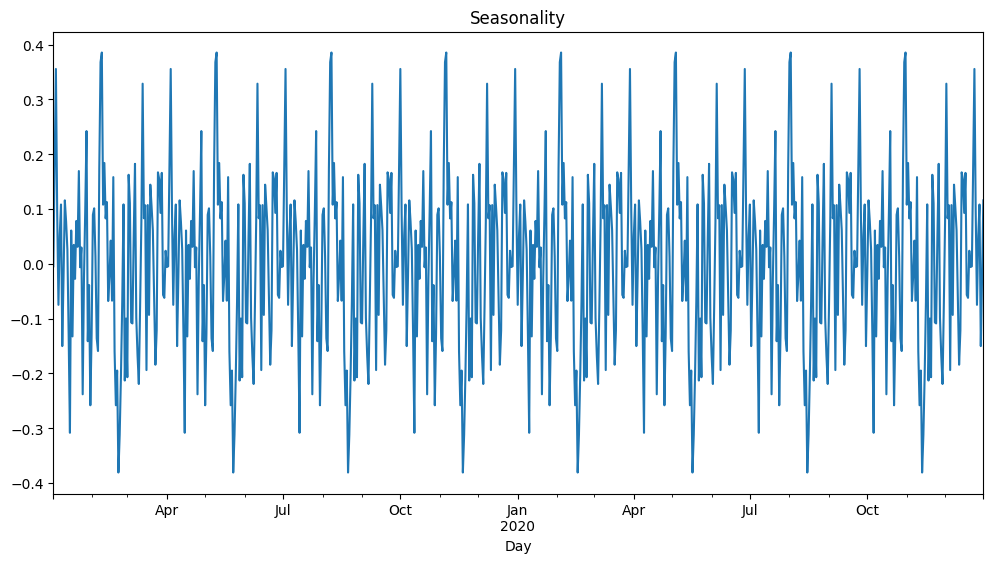

In [20]:
# Seasonality plot 
plt.figure(figsize=(12,6))
plt.title('Seasonality')
decomp.seasonal.plot()

<Axes: title={'center': 'Trends'}, xlabel='Day'>

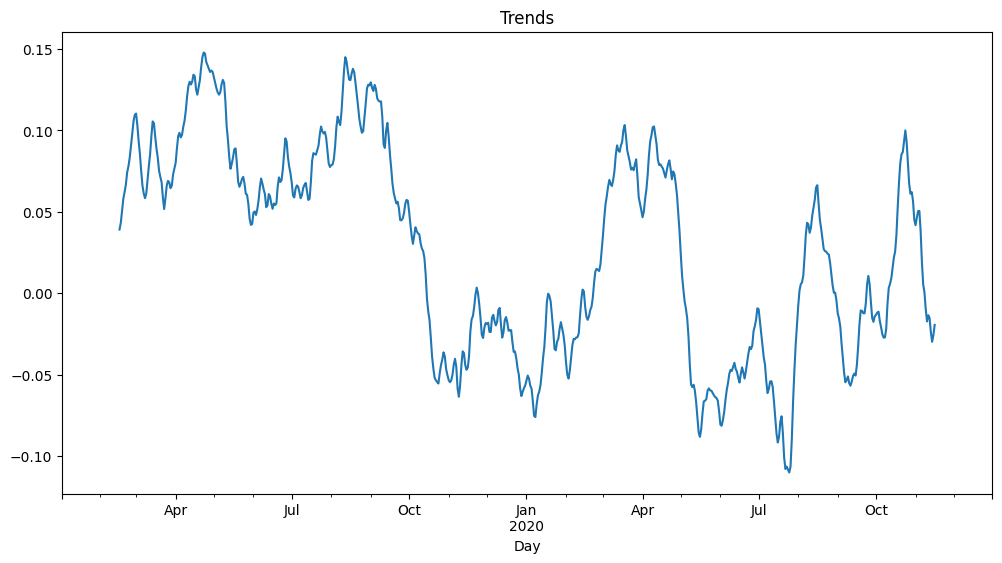

In [21]:
# Trends plot 
plt.figure(figsize=(12,6))
plt.title('Trends')
decomp.trend.plot()

<Axes: title={'center': 'Residuals'}, xlabel='Day'>

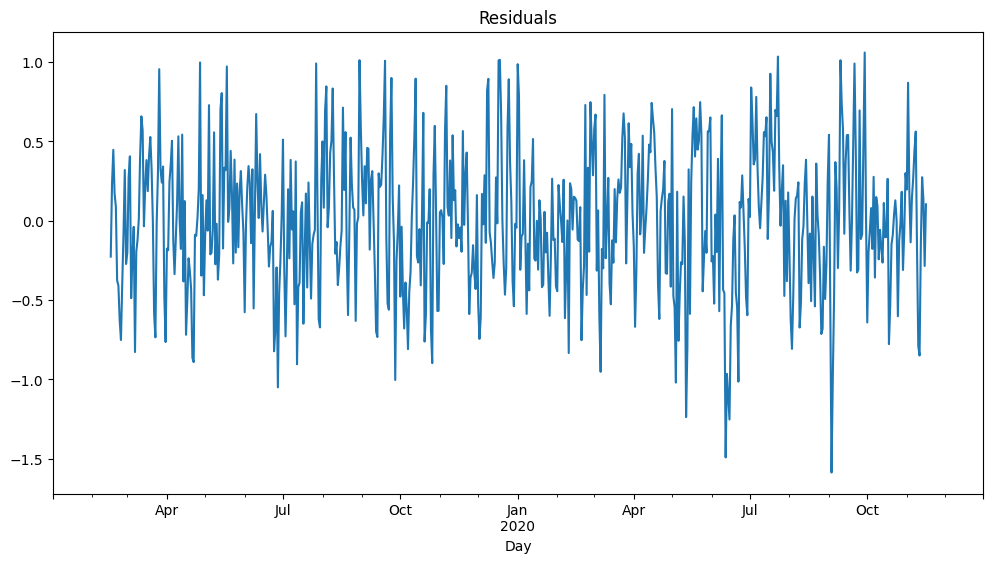

In [22]:
# Residuals 
plt.figure(figsize=(12,6))
plt.title('Residuals')
decomp.resid.plot()

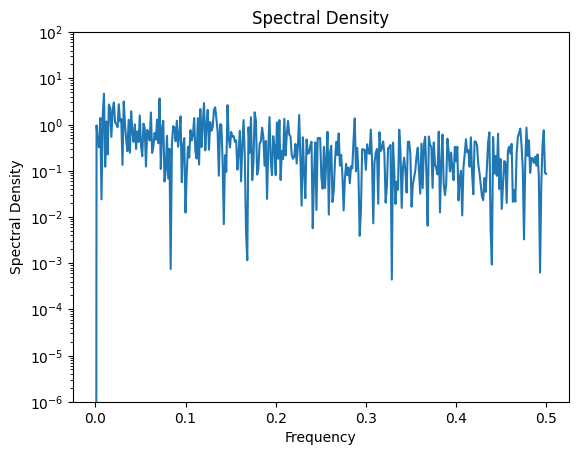

In [23]:
# Spectral Density
from scipy import signal


f, Pxx_den = signal.periodogram(df_stationary['Revenue'])
plt.semilogy(f, Pxx_den)
plt.ylim([1e-6, 1e2])
plt.title('Spectral Density')
plt.xlabel('Frequency')
plt.ylabel('Spectral Density')
plt.show()

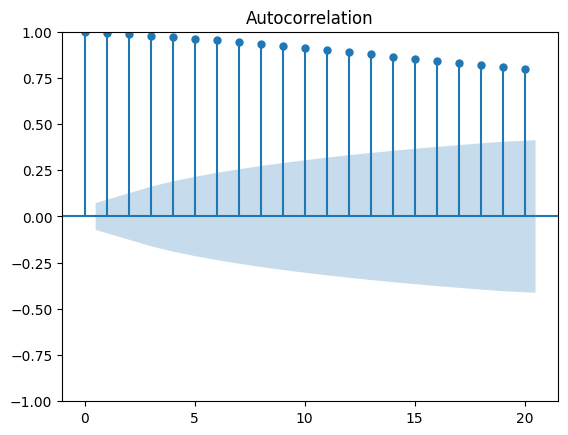

In [24]:
# Autocorrelation - original 
from statsmodels.graphics import tsaplots 
fig = tsaplots.plot_acf(df_med['Revenue'], lags = 20)
plt.show()

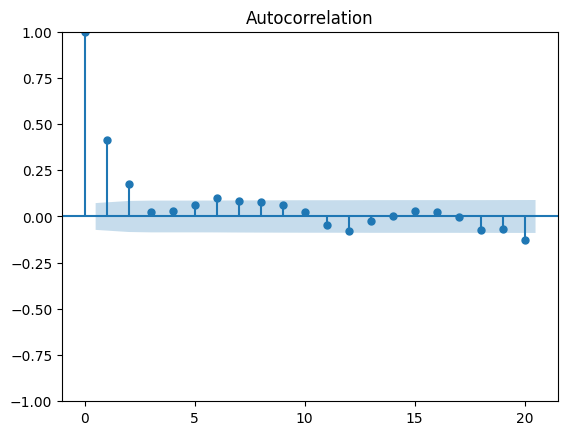

In [25]:
# Autocorrelation - stationary
from statsmodels.graphics import tsaplots 
fig = tsaplots.plot_acf(df_stationary['Revenue'], lags = 20)
plt.show()

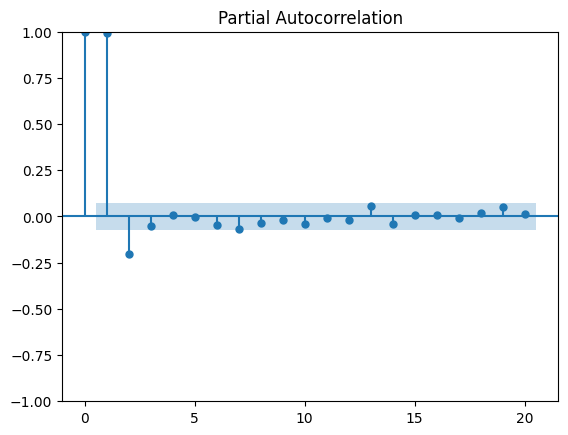

In [26]:
# Partial Autocorrelation - original
fig = tsaplots.plot_pacf(df_med['Revenue'], lags=20) 

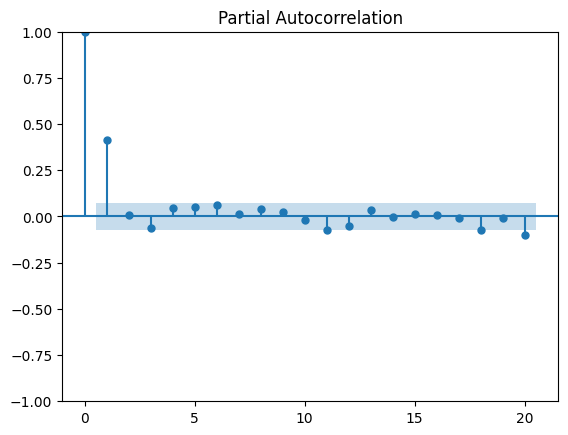

In [27]:
# Partial Autocorrelation - stationary
fig = tsaplots.plot_pacf(df_stationary['Revenue'], lags=20) 

In [28]:
# Auto Arima
from pmdarima import auto_arima

X_train = df_stationary.loc[:'2020-08-06']
X_test = df_stationary.loc['2020-08-07':]

stepwise_fit = auto_arima(X_train['Revenue'], trace=True, supress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=705.600, Time=0.21 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=810.657, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=706.498, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=729.203, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=811.354, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=704.253, Time=0.12 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=702.748, Time=0.06 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=704.175, Time=0.09 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=708.064, Time=0.08 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=705.662, Time=0.30 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=702.004, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=728.964, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=703.430, Time=0.06 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=703.350, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=707.1

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  583
Model:               SARIMAX(0, 0, 2)   Log Likelihood                -348.002
Date:                Mon, 06 Nov 2023   AIC                            702.004
Time:                        18:14:23   BIC                            715.109
Sample:                    01-02-2019   HQIC                           707.112
                         - 08-06-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.3930      0.040      9.771      0.000       0.314       0.472
ma.L2          0.2214      0.040      5.502      0.000       0.143       0.300
sigma2         0.1931      0.012     15.809      0.000       0.169       0.217
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 2.06
Prob(Q):                              0.89   Prob(JB):                         0.36
Heteroskedasticity (H):               1.05   Skew:                            -0.06
Prob(H) (two-sided):                  0.73   Kurtosis:                         2.74
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## ARIMA Model
The best autoregressive integrated moving average (ARIMA) model was found using auto_arima. Auto ARIMA performs a stepwise search with different combinations to find the combination that has the lowest AIC value. The best model includes: ARIMA(0, 0, 2) (0, 0, 0) [0] 

ARIMA(0, 0, 2) (0, 0, 0) [0] -  The first group of values are the p, d, q values within the model. P is 0 indicates that there are no autoregressive parts within the model and there are no lag observations. D is also 0 indicating that the data doesn’t need differencing and that it is stationary. Q is 2 indicating the size of the lagged forecast errors. 

ARIMA(0, 0, 2) (0, 0, 0) [0] -  The second group indicates that there is no seasonality within the model. 

ARIMA(0, 0, 2) (0, 0, 0) [0] -  The third group indicates there is no seasonality period due to not having any seasonality. 


In [29]:
# Testing models - with entire 
from statsmodels.tsa.arima.model import ARIMA

import warnings
warnings.filterwarnings("ignore")

model = ARIMA(X_train['Revenue'], order=(0,1,2))
model_results = model.fit()
model_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                Revenue   No. Observations:                  583
Model:                 ARIMA(0, 1, 2)   Log Likelihood                -364.377
Date:                Mon, 06 Nov 2023   AIC                            734.754
Time:                        18:14:31   BIC                            747.853
Sample:                    01-02-2019   HQIC                           739.860
                         - 08-06-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6699      0.038    -17.608      0.000      -0.744      -0.595
ma.L2         -0.3273      0.039     -8.388      0.000      -0.404      -0.251
sigma2         0.2031      0.013     16.115      0.000       0.178       0.228
===================================================================================
Ljung-Box (L1) (Q):                   2.98   Jarque-Bera (JB):                 1.18
Prob(Q):                              0.08   Prob(JB):                         0.55
Heteroskedasticity (H):               1.06   Skew:                            -0.03
Prob(H) (two-sided):                  0.67   Kurtosis:                         2.79
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [30]:
# Testing models 
from statsmodels.tsa.arima.model import ARIMA

import warnings
warnings.filterwarnings("ignore")

model = ARIMA(X_train['Revenue'], order=(0,1,2))
model_results = model.fit()
model_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                Revenue   No. Observations:                  583
Model:                 ARIMA(0, 1, 2)   Log Likelihood                -364.377
Date:                Mon, 06 Nov 2023   AIC                            734.754
Time:                        18:14:31   BIC                            747.853
Sample:                    01-02-2019   HQIC                           739.860
                         - 08-06-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6699      0.038    -17.608      0.000      -0.744      -0.595
ma.L2         -0.3273      0.039     -8.388      0.000      -0.404      -0.251
sigma2         0.2031      0.013     16.115      0.000       0.178       0.228
===================================================================================
Ljung-Box (L1) (Q):                   2.98   Jarque-Bera (JB):                 1.18
Prob(Q):                              0.08   Prob(JB):                         0.55
Heteroskedasticity (H):               1.06   Skew:                            -0.03
Prob(H) (two-sided):                  0.67   Kurtosis:                         2.79
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [31]:
# Testing models 
from statsmodels.tsa.arima.model import ARIMA

import warnings
warnings.filterwarnings("ignore")

model = ARIMA(X_train['Revenue'], order=(1,1,2))
model_results = model.fit()
model_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                Revenue   No. Observations:                  583
Model:                 ARIMA(1, 1, 2)   Log Likelihood                -352.565
Date:                Mon, 06 Nov 2023   AIC                            713.130
Time:                        18:14:32   BIC                            730.596
Sample:                    01-02-2019   HQIC                           719.939
                         - 08-06-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4592      0.099      4.632      0.000       0.265       0.654
ma.L1         -1.0585      1.289     -0.821      0.412      -3.585       1.468
ma.L2          0.0585      0.138      0.424      0.672      -0.212       0.329
sigma2         0.1948      0.246      0.791      0.429      -0.288       0.678
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 2.10
Prob(Q):                              0.94   Prob(JB):                         0.35
Heteroskedasticity (H):               1.04   Skew:                            -0.03
Prob(H) (two-sided):                  0.80   Kurtosis:                         2.71
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [32]:
# Testing models 
from statsmodels.tsa.arima.model import ARIMA

import warnings
warnings.filterwarnings("ignore")

model = ARIMA(X_train['Revenue'], order=(0,1,1))
model_results = model.fit()
model_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                Revenue   No. Observations:                  583
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -392.396
Date:                Mon, 06 Nov 2023   AIC                            788.792
Time:                        18:14:33   BIC                            797.525
Sample:                    01-02-2019   HQIC                           792.196
                         - 08-06-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7765      0.028    -27.651      0.000      -0.832      -0.721
sigma2         0.2251      0.015     15.084      0.000       0.196       0.254
===================================================================================
Ljung-Box (L1) (Q):                  33.83   Jarque-Bera (JB):                 4.70
Prob(Q):                              0.00   Prob(JB):                         0.10
Heteroskedasticity (H):               0.97   Skew:                             0.07
Prob(H) (two-sided):                  0.83   Kurtosis:                         2.58
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [33]:
# Sarimax model 
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(X_test, order=(0,0,2), seasonal_order=(0,0,0,0))
sarimax_results = model.fit()
sarimax_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                Revenue   No. Observations:                  147
Model:               SARIMAX(0, 0, 2)   Log Likelihood                 -86.561
Date:                Mon, 06 Nov 2023   AIC                            179.122
Time:                        18:14:33   BIC                            188.094
Sample:                    08-07-2020   HQIC                           182.767
                         - 12-31-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.4692      0.079      5.971      0.000       0.315       0.623
ma.L2          0.0949      0.087      1.087      0.277      -0.076       0.266
sigma2         0.1898      0.024      7.919      0.000       0.143       0.237
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.75
Prob(Q):                              0.96   Prob(JB):                         0.69
Heteroskedasticity (H):               1.28   Skew:                             0.13
Prob(H) (two-sided):                  0.38   Kurtosis:                         2.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [34]:
# Final fitting model 
from statsmodels.tsa.arima.model import ARIMA

import warnings
warnings.filterwarnings("ignore")

model = ARIMA(X_train['Revenue'], order=(0,0,2))
model_results = model.fit()
model_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                Revenue   No. Observations:                  583
Model:                 ARIMA(0, 0, 2)   Log Likelihood                -347.374
Date:                Mon, 06 Nov 2023   AIC                            702.748
Time:                        18:14:33   BIC                            720.221
Sample:                    01-02-2019   HQIC                           709.559
                         - 08-06-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0328      0.030      1.110      0.267      -0.025       0.091
ma.L1          0.3914      0.041      9.617      0.000       0.312       0.471
ma.L2          0.2198      0.040      5.470      0.000       0.141       0.299
sigma2         0.1927      0.012     15.831      0.000       0.169       0.217
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                 2.05
Prob(Q):                              0.86   Prob(JB):                         0.36
Heteroskedasticity (H):               1.06   Skew:                            -0.06
Prob(H) (two-sided):                  0.70   Kurtosis:                         2.74
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

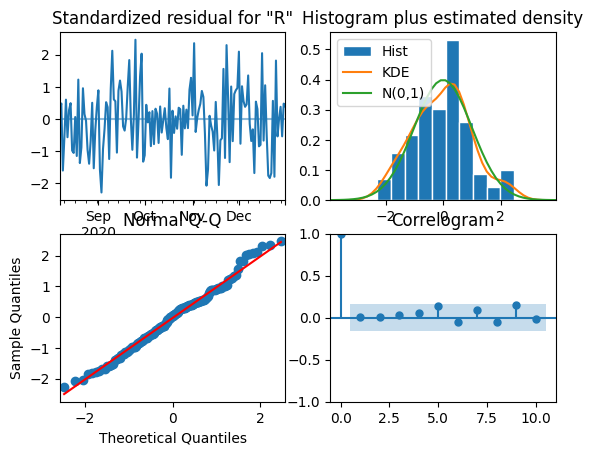

In [35]:
sarimax_results.plot_diagnostics()
plt.show()

In [36]:
# Forecast predictions - in sample - E2
forecast = sarimax_results.get_prediction(start=-30)
mean_forecast = forecast.predicted_mean

confidence_intervals = forecast.conf_int()

# Selecting confidence limits 
lower_limits = confidence_intervals.loc[:, 'lower Revenue']
upper_limits = confidence_intervals.loc[:, 'upper Revenue']

print(mean_forecast) 

2020-12-02    0.467218
2020-12-03   -0.070323
2020-12-04    0.176134
2020-12-05    0.155144
2020-12-06    0.100237
2020-12-07    0.108573
2020-12-08    0.295179
2020-12-09    0.025775
2020-12-10   -0.145647
2020-12-11   -0.093851
2020-12-12   -0.356320
2020-12-13    0.040843
2020-12-14    0.085156
2020-12-15   -0.160717
2020-12-16   -0.198900
2020-12-17    0.384694
2020-12-18   -0.052460
2020-12-19    0.186296
2020-12-20   -0.060010
2020-12-21   -0.380147
2020-12-22   -0.447462
2020-12-23   -0.418912
2020-12-24    0.045675
2020-12-25   -0.343143
2020-12-26    0.296628
2020-12-27   -0.035312
2020-12-28   -0.021087
2020-12-29    0.077601
2020-12-30   -0.094354
2020-12-31    0.075455
Freq: D, Name: predicted_mean, dtype: float64


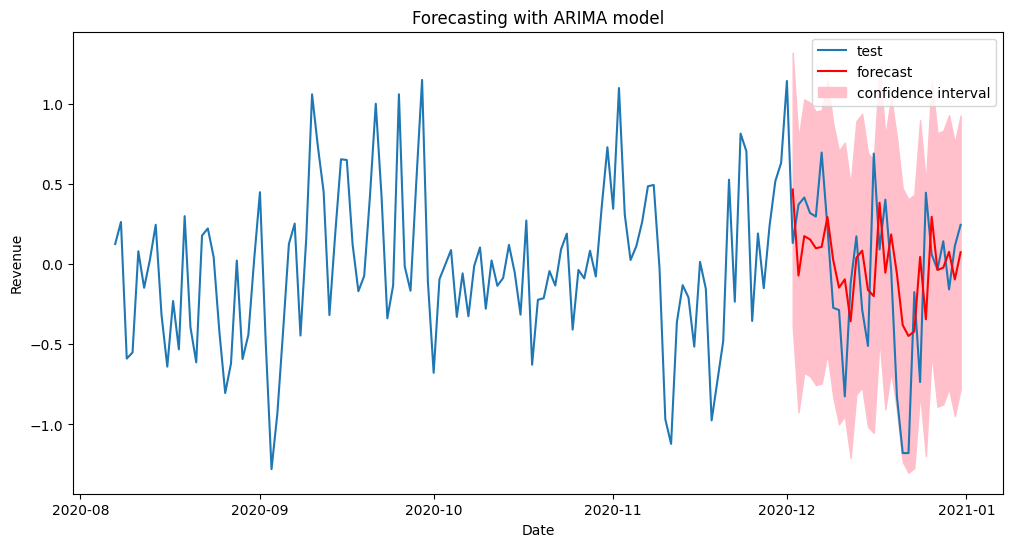

In [39]:
# Forecast predictions - In sample - E2
plt.figure(figsize=(12,6))

plt.plot(X_test.index, X_test, label='test')
plt.plot(mean_forecast.index, mean_forecast, color='r', label='forecast')

plt.fill_between(lower_limits.index, lower_limits, upper_limits, color='pink', label='confidence interval')

plt.xlabel('Date')
plt.ylabel('Revenue')
plt.title('Forecasting with ARIMA model')
plt.legend()
plt.show()

In [41]:
# Forecast predictions - out  of sample predictions - D3
forecast_diff = sarimax_results.get_forecast(steps=180)
mean_forecast_diff = forecast.predicted_mean

confidence_intervals = forecast.conf_int()

# Selecting confidence limits 
lower_limits = confidence_intervals.loc[:, 'lower Revenue']
upper_limits = confidence_intervals.loc[:, 'upper Revenue']

print(mean_forecast_diff) 

2020-12-02    0.467218
2020-12-03   -0.070323
2020-12-04    0.176134
2020-12-05    0.155144
2020-12-06    0.100237
2020-12-07    0.108573
2020-12-08    0.295179
2020-12-09    0.025775
2020-12-10   -0.145647
2020-12-11   -0.093851
2020-12-12   -0.356320
2020-12-13    0.040843
2020-12-14    0.085156
2020-12-15   -0.160717
2020-12-16   -0.198900
2020-12-17    0.384694
2020-12-18   -0.052460
2020-12-19    0.186296
2020-12-20   -0.060010
2020-12-21   -0.380147
2020-12-22   -0.447462
2020-12-23   -0.418912
2020-12-24    0.045675
2020-12-25   -0.343143
2020-12-26    0.296628
2020-12-27   -0.035312
2020-12-28   -0.021087
2020-12-29    0.077601
2020-12-30   -0.094354
2020-12-31    0.075455
Freq: D, Name: predicted_mean, dtype: float64


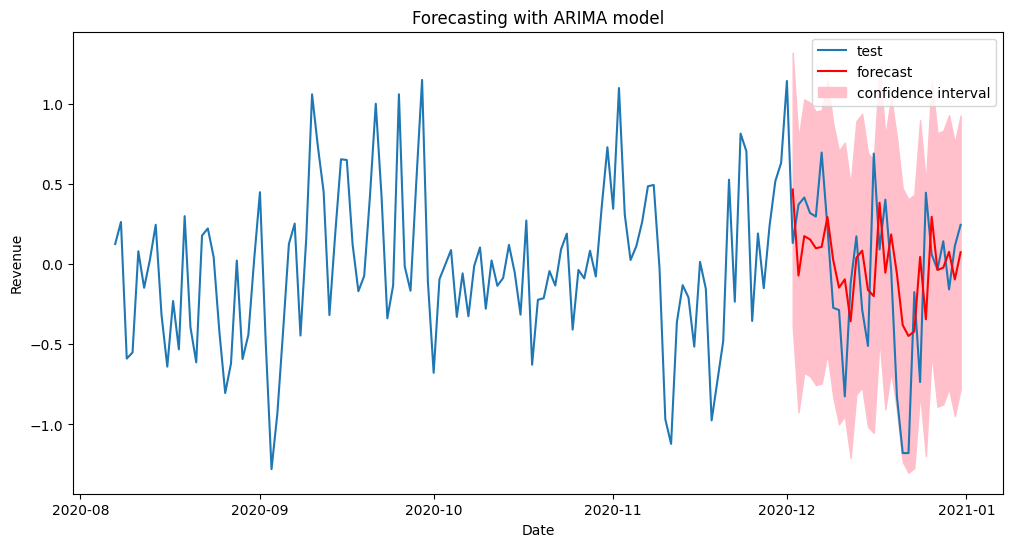

In [46]:
# Forecast predictions - out of sample predictions - D3
plt.figure(figsize=(12,6))

plt.plot(X_test.index, X_test, label='test')
plt.plot(mean_forecast_diff.index, mean_forecast_diff, color='r', label='forecast')

plt.fill_between(lower_limits.index, lower_limits, upper_limits, color='pink', label='confidence interval')

plt.xlabel('Date')
plt.ylabel('Revenue')
plt.title('Forecasting with ARIMA model')
plt.legend()
plt.show()

In [126]:
# Defining prediction
start = len(X_train)
end = len(X_train)+len(X_test)-1
pred = model_results.predict(start=start, end=end, typ='levels')

In [108]:
mean_predicted_values = mean_forecast.mean()
print(f'The mean of the predicted values is {mean_predicted_values:.4f} or ${mean_predicted_values * 1000000:,.0f}')

The mean of the predicted values is -0.0122 or $-12,157


In [114]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

# Calculate RMSE
rmse = sqrt(mean_squared_error(X_test['Revenue'], pred))
print(f'The RMSE of the predicted values is {rmse:.4f}')

# Calculate MAE
mae = mean_absolute_error(X_test['Revenue'], pred)
print(f'The MAE of the predicted values is {mae:.4f}')

# Calculate MSE
mse = mean_squared_error(X_test['Revenue'], pred)
print(f'The MSE of the predicted values is {mse:.4f}')


The RMSE of the predicted values is 0.4869
The MAE of the predicted values is 0.3739
The MSE of the predicted values is 0.2371


## Data Summary and Implications 
• The selection of an ARIMA model<br>
To select the ARIMA model, multiple order combinations were looked at. After running different combinations, we selected the ARIMA model with the lowest Akaike information criterion (AIC). We also used auto_arima to find the best model fit to solidify our choice: ARIMA(0, 0, 2) (0, 0, 0) [0]. Code is included in the Jupyter file. 

• The prediction interval of the forecast <br>
“The prediction interval of the forecast is 1 day.” (Elleh, 2021) Our model was optimized to create daily forecasts considering factors such as seasonality. The upper and lower limits of the confidence interval were found and then used to create a bound for the predictions within the model. 

• A justification of the forecast length <br>
The forecast length for this model was 30 days. Due to our data only showing 2 years and our test data showing only 147 days, it is better to forecast and predict a lower amount of data to increase accuracy. To increase the forecast length, we would need more historical data. 

• The model evaluation procedure and error metric <br>
An ARIMA model was created through multiple order combinations and was ultimately optimized throughout the auto_arima selection process. We found the best suited p, q, and d values and using auto_arima we found that seasonality was not present, and the seasonality order was (0,0,0,0). The mean square error (MSE) was 0.2371, the root mean squared error (RMSE) was 0.4869, and the mean absolute error (MAE) was 0.3739. “If the error metrics are so low and so close to 0, you conclude that the error rates are low given the number of observations in the data.” (Elleh, 2021) 

## Recommendations 
Based on the results, the recommended course of action would include focusing on readmission rates to decrease payment penalties. It is evident that the predictions indicate an overall loss of revenue based on the mean of the predictions, although it’s important to note that more details to indicate where the loss of revenue stems from is crucial to make a definitive conclusion. Another recommendation would be to do a more in-depth analysis to address the underlying issues causing the loss of revenue. 